<a href="https://colab.research.google.com/github/FJSam/SelfCritical_ImageCaptioning/blob/main/Paddle_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PADDLE OCR

In [ ]:
import os
import tensorflow as tf
import shlex
from subprocess import Popen, PIPE
import time
from PIL import Image
#!pip install nltk==3.5
import nltk
nltk.download('stopwords')
nltk.download('words')
from nltk.corpus import stopwords, words as eng_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


## Environment Setup

 Select you working directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#os.chdir(r"your-working-directory")
print(os.getcwd())

/content


## Download S3 Paddle OCR - GPU

In [ ]:
# Download already compiled GPU models from AWS
dl_start = time.time()
paddle_folder = '/PaddleOCR-develop/'
if not os.path.exists(os.path.abspath('.') + paddle_folder):
  paddle_zip = tf.keras.utils.get_file('paddle_ocr.zip',
                                      cache_subdir=os.path.abspath('.'),
                                      origin = 'https://aipoc-sourcedata-store.s3.eu-west-2.amazonaws.com/ocr/PaddleOCR-develop.zip',
                                      extract = True)
  PATH = os.path.dirname(paddle_zip) + paddle_folder
  print(PATH)
  os.remove(paddle_zip)

else:
  PATH = os.path.abspath('.') + paddle_folder
  print(PATH)

dl_end = time.time()
print((dl_end - dl_start)/60)

1530830848/1530825886 [==============================] - 925s 1us/step
D:\Fujitsu\Image_Captioning/PaddleOCR-develop/
16.291468771298728


In [ ]:
! pip install paddlepaddle-gpu==1.8.5.post107

In [ ]:
os.chdir(r"/content/PaddleOCR-develop")

## Download S3 Paddle OCR - CPU

In [ ]:
# Download already compiled CPU models from AWS
dl_start = time.time()
paddle_folder = '/PaddleOCR-CPU-develop/'
if not os.path.exists(os.path.abspath('.') + paddle_folder):
  paddle_zip = tf.keras.utils.get_file('paddle_cpu_ocr.zip',
                                      cache_subdir=os.path.abspath('.'),
                                      origin = 'https://aipoc-sourcedata-store.s3.eu-west-2.amazonaws.com/ocr/PaddleOCR-CPU-develop.zip',
                                      extract = True)
  PATH = os.path.dirname(paddle_zip) + paddle_folder
  print(PATH)
  os.remove(paddle_zip)

else:
  PATH = os.path.abspath('.') + paddle_folder
  print(PATH)

dl_end = time.time()
print((dl_end - dl_start)/60)

1529036800/1529035018 [==============================] - 68s 0us/step
/content/PaddleOCR-CPU-develop/
1.4860484719276428


In [ ]:
! pip install paddlepaddle==1.8.5

     |████████████████████████████████| 111.3MB 73kB/s 


In [ ]:
os.chdir(r"/content/PaddleOCR-CPU-develop")

In [ ]:
print(os.getcwd())

/content/PaddleOCR-CPU-develop


In [ ]:
#! pip install -r "/content/PaddleOCR-develop/requirements.txt"

#! pip install -r "/content/drive/MyDrive/Colab_Notebooks/PaddleOCR-develop/requirements.txt"

! pip install -r "requirements.txt"

     |████████████████████████████████| 133kB 7.6MB/s 


## To build model from scratch

In [ ]:
! git clone https://github.com/PaddlePaddle/PaddleOCR.git

## Convert SAST Detection Model to Inference Model

In [ ]:
req_path= 'you-working-directory/PaddleOCR'
os.chdir(req_path)
print(os.getcwd())

In [ ]:
!python tools/export_model.py -c configs/det/det_r50_vd_sast_icdar15.yml -o Global.checkpoints=./sast_r50_vd_icdar2015/sast_r50_vd_icdar2015/best_accuracy Global.save_inference_dir=./inference/det_sast/

2020-12-03 12:25:13,201-INFO: {'Global': {'debug': False, 'algorithm': 'SAST', 'use_gpu': False, 'epoch_num': 2000, 'log_smooth_window': 20, 'print_batch_step': 2, 'save_model_dir': './output/det_sast/', 'save_epoch_step': 20, 'eval_batch_step': 5000, 'train_batch_size_per_card': 8, 'test_batch_size_per_card': 8, 'image_shape': [3, 512, 512], 'reader_yml': './configs/det/det_sast_icdar15_reader.yml', 'pretrain_weights': './pretrain_models/ResNet50_vd_ssld_pretrained/', 'save_res_path': './output/det_sast/predicts_sast.txt', 'checkpoints': './sast_r50_vd_icdar2015/sast_r50_vd_icdar2015/best_accuracy', 'save_inference_dir': './inference/det_sast/', 'infer_img': None}, 'Architecture': {'function': 'ppocr.modeling.architectures.det_model,DetModel'}, 'Backbone': {'function': 'ppocr.modeling.backbones.det_resnet_vd_sast,ResNet', 'layers': 50}, 'Head': {'function': 'ppocr.modeling.heads.det_sast_head,SASTHead', 'model_name': 'large', 'only_fpn_up': False, 'with_cab': True}, 'Loss': {'function

## Convert SRN Recognition Model to Inference Model

In [ ]:
!python tools/export_model.py -c configs/rec/rec_r50fpn_vd_none_srn.yml -o Global.checkpoints=./rec_r50fpn_vd_none_srn/best_accuracy Global.save_inference_dir=./inference/rec_srn/

2020-12-03 12:25:39,119-INFO: {'Global': {'debug': False, 'algorithm': 'SRN', 'use_gpu': False, 'epoch_num': 72, 'log_smooth_window': 20, 'print_batch_step': 10, 'save_model_dir': 'output/rec_pvam_withrotate', 'save_epoch_step': 1, 'eval_batch_step': 8000, 'train_batch_size_per_card': 64, 'test_batch_size_per_card': 1, 'image_shape': [1, 64, 256], 'max_text_length': 25, 'character_type': 'en', 'character_dict_path': None, 'loss_type': 'srn', 'num_heads': 8, 'average_window': 0.15, 'max_average_window': 15625, 'min_average_window': 10000, 'reader_yml': './configs/rec/rec_benchmark_reader.yml', 'pretrain_weights': None, 'checkpoints': './rec_r50fpn_vd_none_srn/best_accuracy', 'save_inference_dir': './inference/rec_srn/', 'infer_img': None}, 'Architecture': {'function': 'ppocr.modeling.architectures.rec_model,RecModel'}, 'Backbone': {'function': 'ppocr.modeling.backbones.rec_resnet_fpn,ResNet', 'layers': 50}, 'Head': {'function': 'ppocr.modeling.heads.rec_srn_all_head,SRNPredict', 'encode

## Download test Images

In [ ]:
# Download test images from AWS
os.chdir("/content")
dl_start = time.time()
ocr_folder = '/ocr_test_images/'
if not os.path.exists(os.path.abspath('.') + ocr_folder):
  ocr_zip = tf.keras.utils.get_file('ocr_test_images.zip',
                                      cache_subdir=os.path.abspath('.'),
                                      origin = 'https://aipoc-sourcedata-store.s3.eu-west-2.amazonaws.com/images/ocr_test_images.zip',
                                      extract = True)
  ocr_PATH = os.path.dirname(ocr_zip) + ocr_folder
  print(ocr_PATH)
  os.remove(ocr_zip)

else:
  ocr_PATH = os.path.abspath('.') + ocr_folder
  print(ocr_PATH)

dl_end = time.time()
print((dl_end - dl_start)/60)

1015808/1009570 [==============================] - 1s 1us/step
/content/ocr_test_images/
0.02473523219426473


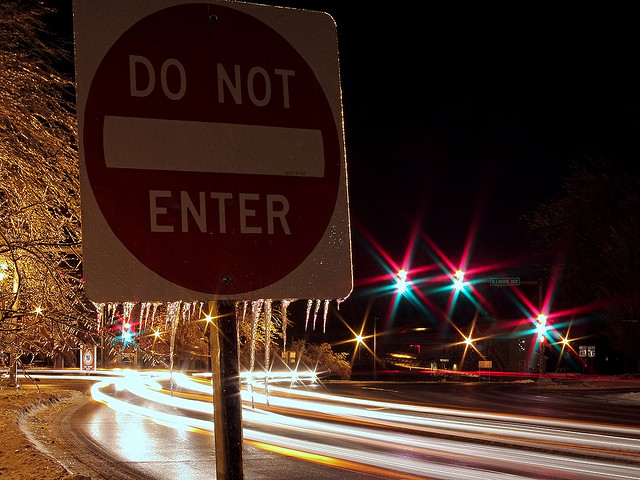

In [ ]:
## DEFINE YOUR SAMPLE IMAGE TO TEST
image = "/content/ocr_test_images/ocr_test_1.jpg"
Image.open(image)

### CPU Prediction

In [ ]:
req_path = '/content/PaddleOCR-CPU-develop'
os.chdir(req_path)
print(os.getcwd())

/content/PaddleOCR-CPU-develop


### GPU Prediction

In [ ]:
req_path = '/content/PaddleOCR-develop'
os.chdir(req_path)
print(os.getcwd())

## Prediction 

In [ ]:
def get_exitcode_stdout_stderr(cmd):
    """
    Execute the external command and get its exitcode, stdout and stderr.
    """
    args = shlex.split(cmd)
    proc = Popen(args, stdout=PIPE, stderr=PIPE)
    out, err = proc.communicate()
    exitcode = proc.returncode
    return exitcode, out, err

In [ ]:
def get_paddle_ocr_text(image, threshold=0.95):
  s = time.time()
  cmd = f'python tools/infer/predict_system.py --image_dir={image}\
    --det_model_dir="./inference/det_sast/" --det_algorithm="SAST" \
    --rec_model_dir="./inference/rec_srn/" --rec_image_shape="1, 64, 256" --rec_char_type="en" --rec_algorithm="SRN"'

  final_text = ''
  exitcode, out, err = get_exitcode_stdout_stderr(cmd)
  if exitcode == 0:
    ans = out.decode("utf-8")
    if ans.find('/') != -1:
      init_ans = ans.split("/")
      init_ans.reverse()
      interim_ans = [tuple(text.split(',')) for text in init_ans if text.find('\n') == -1 ]
      fin_ans = [tup[0] for tup in interim_ans if (float(tup[1]) >= threshold) or (tup[0].lower() in eng_words.words())] 
      final_text = ' '.join(fin_ans)
  
  return final_text , round(time.time()-s, 1)

In [ ]:
x, y = get_paddle_ocr_text(image)
print(f'ocr prediction: {x}')

ocr prediction: do not enter
